# Resumen

Para abordar la primera entrega del trabajo practico del curso, intoducción al data sciende de la Universidad de Palermo, se describirá analiticamente un dataset de ejemplo. Para esto se utilizaran los conocimientos de exploración, descripción estadística y vizualización aprendidos durante el curso.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv("/Users/facundolanus/Downloads/train.csv")

Para abarcar el análisis de datos, de un dataset, en primer lugar se deber revisar, cómo esta compuesto. Esto es, ver las filas y columnas, en otras palabras, la estrucrtura del dataset.

In [11]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


# 1- Distribuciones

El dataset está compuesto por 13 columnas y 29451 filas

In [9]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [86]:
df.shape

(29451, 13)

 Explrando el nombre de las columnas, se ve que la columna target es TARGET(PRICE_IN_LACS)

Las numéricas o categóricas se pueden identificar observando la estructura del datasert, con df.info(). Además de observar los valores por las cuales están compuestas, se puede deteriminar el tipo de columna según el Datatype. Esto es, "Object" si es categórica o "Float"/"Integer" (int64) si es numérica.

In [4]:
df.info()#ecodeada categorica como numerica.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


Al revisar el tipo de campo, datatype y los valores que contienen las celdas, se puede decir que, existe variables claramente categóricas, POSTED_BY, BHK_OR_BK, ADRESS, o numéricas, SQUARE_FT, LONGITUDE, LATITUDE.
Pero otras, que si bien son numéricas discretas, por su naturaleza, se observa que en realidad son categóricas, esto es definir el valor 1 ó 0, en lugar de "SI" ó "NO".
Este es el caso de todas las demás, excepto el target.
En conclusión la clasificación sería así:

In [12]:
categoricas = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK','READY_TO_MOVE'
               , 'RESALE', 'ADDRESS']

target = ['TARGET(PRICE_IN_LACS)']

numericas = df[['SQUARE_FT','LONGITUDE','LATITUDE']]

In [10]:
#categoricas = df.select_dtypes(include=['object']).columns

In [11]:
#categoricas

Index(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'], dtype='object')

In [13]:
#numericas = df.select_dtypes(include=['int64','float64']).columns

In [14]:
#numericas

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

Una vez identificadas los tipo de variables, se analizan las distribuciones de los valores. 
Esto es, ver entre que rangos se mueven o que valores pueden alcanzar, cada una de las columnas.
Por ejemplo, en la variable numerica discreta UNDER_CONSTRUCTION podemos ver que se mueve entre los valores Mínimos = 0 y Máximos = 1. 
También, SQUARE_FT, numérica continua, está descripta por los siguientes valores;
promedio: 19.082
desvío: 19.013
Mínimo: 3
máximo: 254.545.500

In [124]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


Se convierte la columna pies cuadrados, SQUARE_FT, a metros cuadrados, mts_2.

In [73]:
numericas.head()

,SQUARE_FT,LONGITUDE,LATITUDE,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,1300.236407,12.969910,77.597960,0,0,2,1,1,55.0
1,1275.000000,12.274538,76.644605,0,0,2,1,1,51.0
2,933.159722,12.778033,77.632191,0,0,2,1,1,43.0
3,929.921143,28.642300,77.344500,0,1,2,1,1,62.5
4,999.009247,22.592200,88.484911,1,0,2,0,1,60.5


In [4]:
import matplotlib.pyplot as plt

In [149]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),mts_2
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746,1.839681e+03
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713,1.766397e+05
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000,2.787090e-01
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000,8.361466e+01
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000,1.091663e+02
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000,1.440636e+02
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000,2.364804e+07


De las variables numercias, podemos decir que son continuas, los metros cuadrados de superficie de las casas está 1.839 m2, con mìnimo de 0,2 y màximos de 23.648.040 m2

# 2 - Vizualizacion

El histograma de SQUARE_FT, genera solo una barra y no muestra ninguna distribución, debido a los valores extremos. Al intentar generar un histograma que contenga solo aquellos menores al promedio, genra el siguiente:

(array([ 106., 2236., 5225., 8080., 5859., 3522., 1663.,  861.,  532.,
         285.]),
 array([   3.      ,  302.688462,  602.376924,  902.065386, 1201.753848,
        1501.44231 , 1801.130772, 2100.819234, 2400.507696, 2700.196158,
        2999.88462 ]),
 <BarContainer object of 10 artists>)

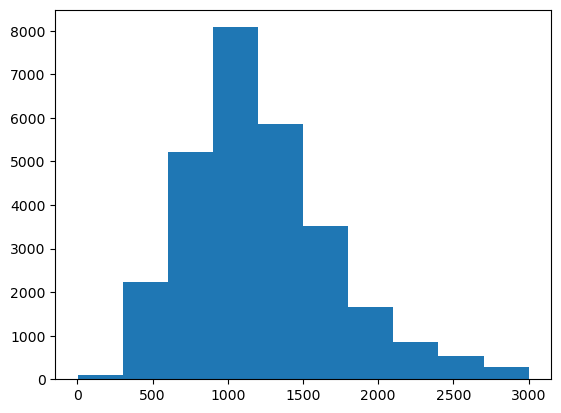

In [6]:
plt.hist(x=df[df['SQUARE_FT']<3000].SQUARE_FT)

<Axes: xlabel='SQUARE_FT'>

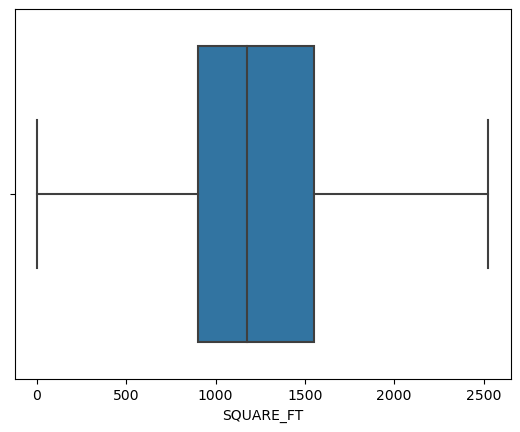

In [11]:
sns.boxplot(df,x='SQUARE_FT',showfliers= False)

In [ ]:
sns.boxplot(df,x=target ,showfliers=False) NO EJECUTA

### Tarea: generar gráficos de barra de las variables categoricas

La variable POSTED_BY indicaría que hay 3 tipos de publicadores para cada ubicación de departamento o casa; dueño, constructor o dealer.

In [58]:
df['POSTED_BY'].value_counts()

POSTED_BY
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64

<Axes: xlabel='POSTED_BY', ylabel='count'>

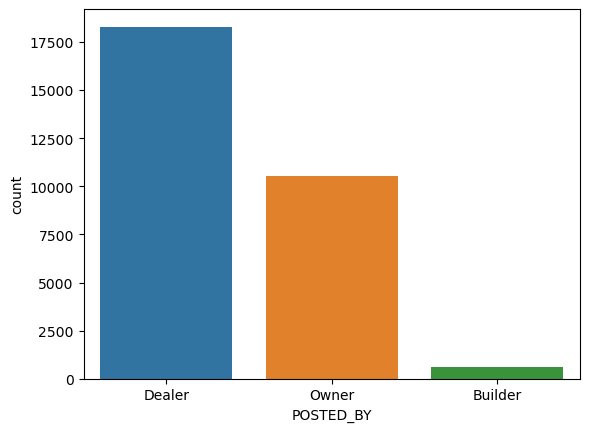

In [219]:
sns.barplot(x=df['POSTED_BY'].value_counts().index[0:3], y=df['POSTED_BY'].value_counts()[0:3])

La variable UNDER CONSTRUCTION indicaría dos estados de las viviendas, si está construida o sin terminar. Aproximadamente la 1/6 parte de las viviendas estan en construcción

In [60]:
df['UNDER_CONSTRUCTION'].value_counts()

UNDER_CONSTRUCTION
0    24157
1     5294
Name: count, dtype: int64

<Axes: xlabel='UNDER_CONSTRUCTION', ylabel='count'>

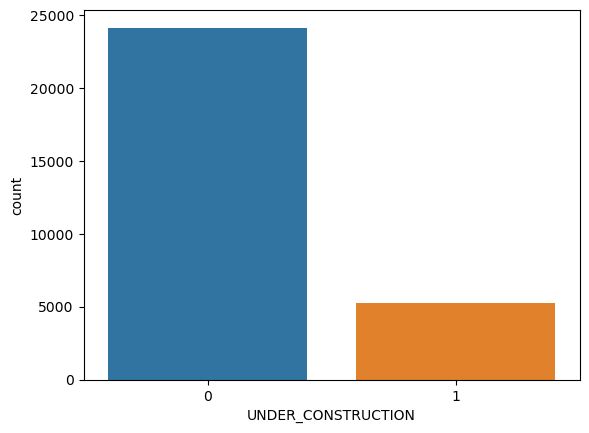

In [220]:
sns.barplot(x=df['UNDER_CONSTRUCTION'].value_counts().index[0:3], y=df['UNDER_CONSTRUCTION'].value_counts()[0:3])

la variable RERA no se entiende, pero indica dos casos con un 1/3 de los casos positivos para esa variable.

In [61]:
df['RERA'].value_counts()

RERA
0    20088
1     9363
Name: count, dtype: int64

<Axes: xlabel='RERA', ylabel='count'>

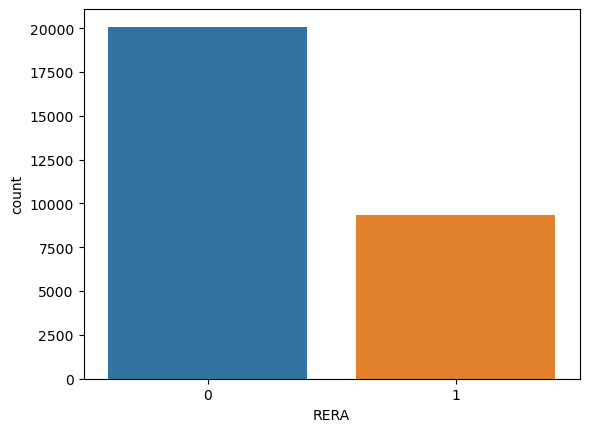

In [221]:
sns.barplot(x=df['RERA'].value_counts().index[0:3], y=df['RERA'].value_counts()[0:3])

BKH_NO. tiene 20 estados distintos, la mayoría se ubican en el estado 1, 2 y 3 (92% de los casos)

### Distribución de proporciones

In [266]:
df['BHK_NO.'].value_counts()/df['BHK_NO.'].count()

BHK_NO.
2     0.452412
3     0.358086
1     0.121354
4     0.058504
5     0.006451
6     0.001766
7     0.000374
8     0.000340
20    0.000136
10    0.000136
15    0.000136
12    0.000102
9     0.000102
13    0.000034
17    0.000034
11    0.000034
Name: count, dtype: float64

In [62]:
df['BHK_NO.'].value_counts()

BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64

### vizualizacion de variables numericas

<Axes: xlabel='BHK_NO.', ylabel='count'>

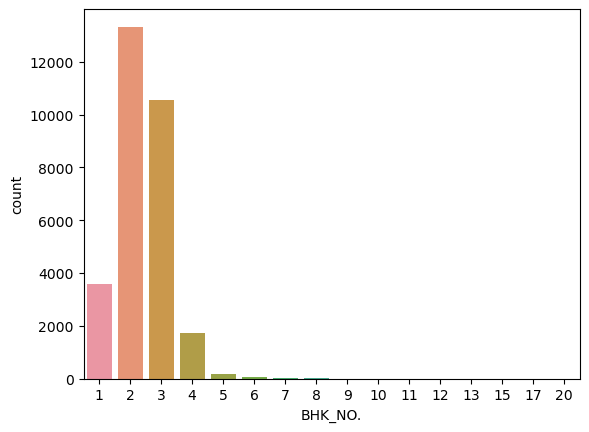

In [231]:
sns.barplot(x=df['BHK_NO.'].value_counts().index[0:df.shape[0]], y=df['BHK_NO.'].value_counts()[0:df.shape[0]])

la variable BHK_OR_RK tiene 2 valores distitos, RK o BHK, casi en su totalidad con valores BHK, solo 24 en RK.

### vizualizacion de variables categóricas

In [63]:
df['BHK_OR_RK'].value_counts()

BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64

<Axes: xlabel='BHK_OR_RK', ylabel='count'>

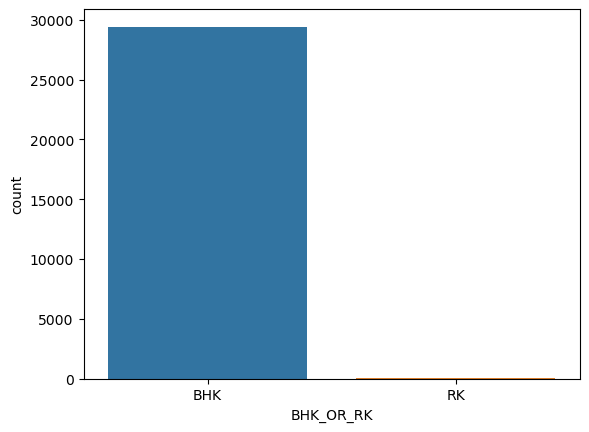

In [223]:
sns.barplot(x=df['BHK_OR_RK'].value_counts().index[0:3], y=df['BHK_OR_RK'].value_counts()[0:3])

LA variable READY TO MOVE indicaría las posibilidad de habitar la vivienda y la cantidad de casos negativos coincide con los que estan UNDER CONSTRUCTION. (Ver correlación/colinealidad, sería la misma variable)

In [64]:
df['READY_TO_MOVE'].value_counts()

READY_TO_MOVE
1    24157
0     5294
Name: count, dtype: int64

<Axes: xlabel='READY_TO_MOVE', ylabel='count'>

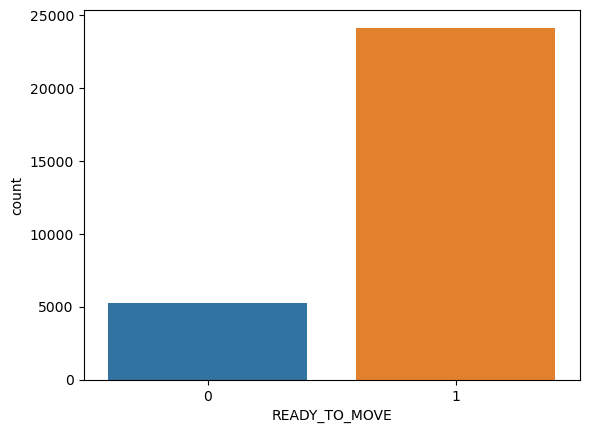

In [232]:
sns.barplot(x=df['READY_TO_MOVE'].value_counts().index[0:3], y=df['READY_TO_MOVE'].value_counts()[0:3])

La variable RESALE, indicaría si la vivienda es de reventa (92%) o a estrenar. 

In [267]:
df['RESALE'].value_counts()/df['RESALE'].count()

RESALE
1    0.929578
0    0.070422
Name: count, dtype: float64

In [65]:
df['RESALE'].value_counts()

RESALE
1    27377
0     2074
Name: count, dtype: int64

<Axes: xlabel='RESALE', ylabel='count'>

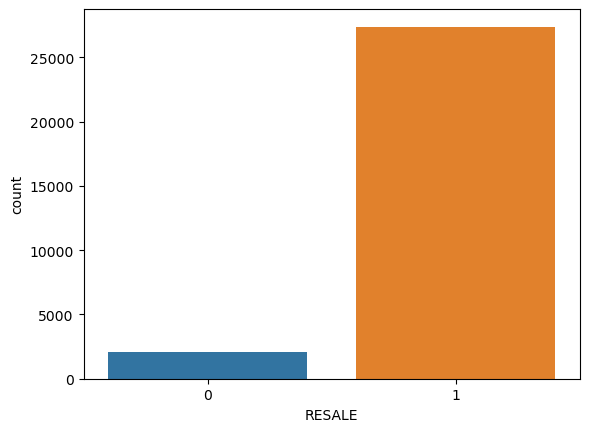

In [233]:
sns.barplot(x=df['RESALE'].value_counts().index[0:3], y=df['RESALE'].value_counts()[0:3])

La variable ADDRESS indicaría la ubicación del inmueble y la mayoría estan ubicadas en India. Aunque hay muchas distribuidas por el resto del mundo. Según la latitud y longitud.

In [66]:
df['ADDRESS'].value_counts()

ADDRESS
Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad         215
Sector-137 Noida,Noida                139
New Town,Kolkata                      131
                                     ... 
Ambika Township,Jivarajpark,Rajkot      1
Cheranalloor,Kochi                      1
Baba Nagar,Bangalore                    1
Barra Devi Naubasta road,Kanpur         1
E3-108, Lake View Recidency,,Vapi       1
Name: count, Length: 6899, dtype: int64

### Vizualizacion de coordenadas (mapeo del target)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objects as go

/Users/facundolanus/anaconda3/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1683: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


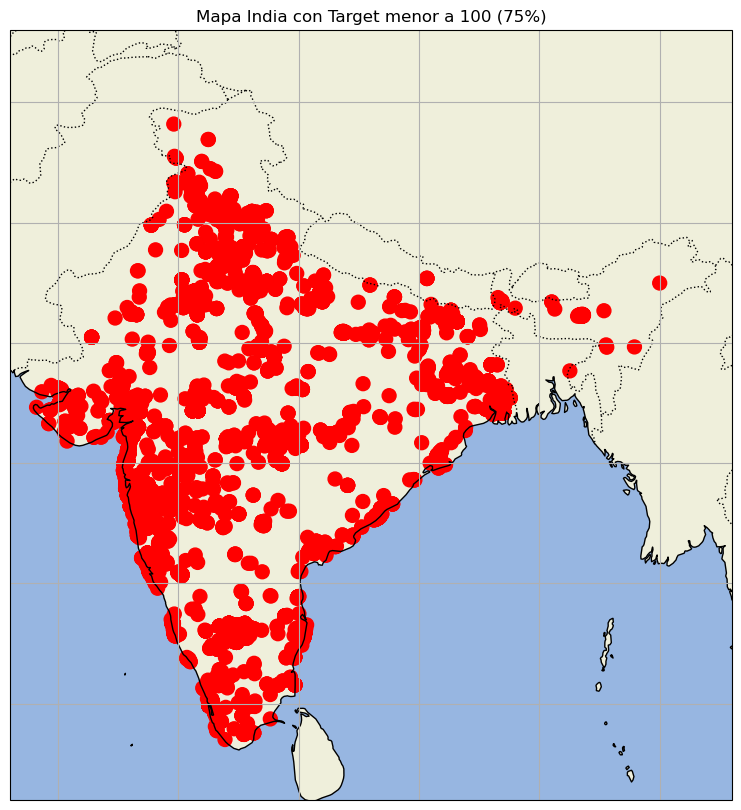

In [290]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crear una figura y un conjunto de ejes con proyección
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Ajustar los límites del mapa para mostrar solo la India
ax.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

# Añadir características al mapa
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Añadir líneas de cuadrícula
ax.gridlines()

# Añadir título
plt.title('Mapa India con Target menor a 100 (75%)')

# Calcular el promedio de la variable TARGET
mean_target = df['TARGET(PRICE_IN_LACS)'].mean()

# Asignar colores basados en si el valor de TARGET es mayor o menor que el promedio
#colors = ['red' if val > mean_target else 'blue' for val in df['TARGET(PRICE_IN_LACS)']]
colors = ['red' if val < 100 else 'None' for val in df['TARGET(PRICE_IN_LACS)']]
          
ax.scatter(df['LATITUDE'], df['LONGITUDE'], c = colors, cmap='viridis', s=100
           , transform=ccrs.PlateCarree(), label='Cities')

#cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05)
#cbar.set_label('Valor de TARGET')


# Mostrar el mapa
plt.show()



#sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df, palette='viridis', s=100)

El mapa anterior muestra la ubicacion de las casas menor a 100 LACS. Las mismas se distribuyen en la india sin distinción de zonas.

### correlacion target longitud

/Users/facundolanus/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


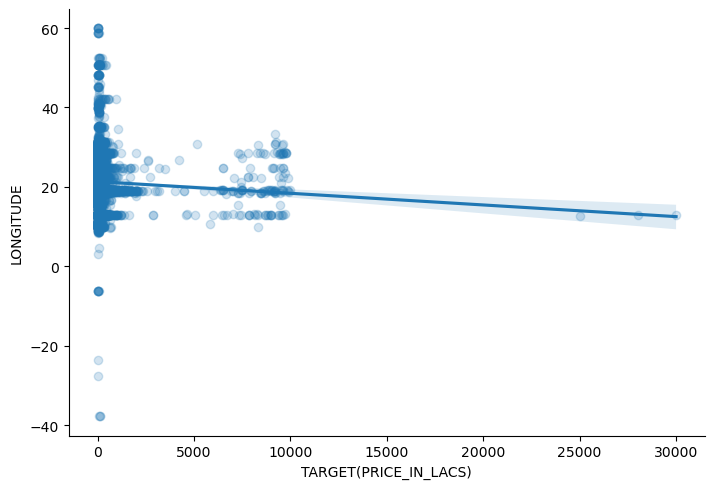

In [332]:
data = df
sns.lmplot(
    x= 'TARGET(PRICE_IN_LACS)', y='LONGITUDE', 
                    data = data , 
           aspect=1.45, scatter_kws={'alpha':0.2})

### Histograma target mayor a 5000

(array([ 2., 32.,  2., 54.,  3.,  9.,  9., 22.,  6.,  2.]),
 array([ 9.930471 , 12.2824239, 14.6343768, 16.9863297, 19.3382826,
        21.6902355, 24.0421884, 26.3941413, 28.7460942, 31.0980471,
        33.45     ]),
 <BarContainer object of 10 artists>)

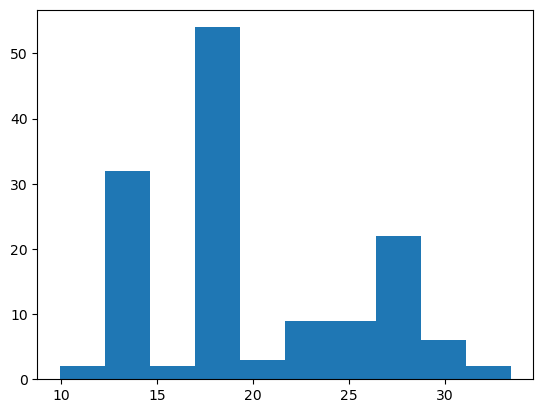

In [5]:
plt.hist(x=df[df['TARGET(PRICE_IN_LACS)']>5000].LONGITUDE)

En cuanto a la variable LONGITUDE, más alla de la correlación negativa con el precio, se ve que en los precios que van de 5000 a 30.000 lACS, estan mayoritariamente entre los meridianos; 12-15, 17-19, 27-28.
Es decir, hay 3 picos y una moda.

### Correlación terget latitud

/Users/facundolanus/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


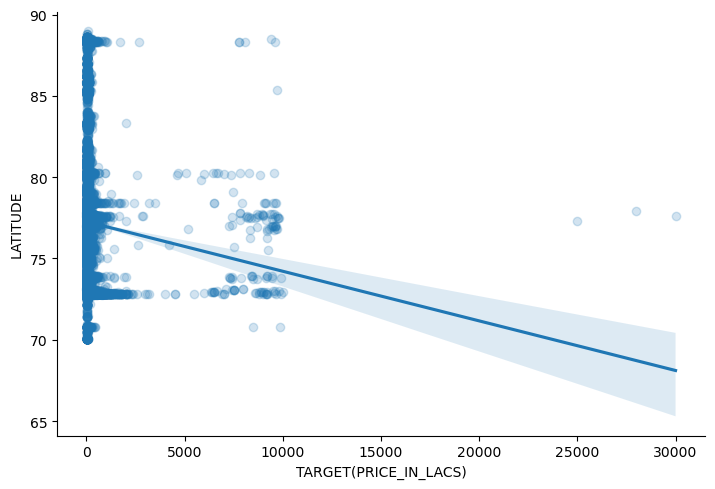

In [356]:
data = df[(df['LATITUDE'] > 70) & (df['LATITUDE'] <= 90)]
#data = df
sns.lmplot(
    x= 'TARGET(PRICE_IN_LACS)', y='LATITUDE', 
                    data = data , 
           aspect=1.45, scatter_kws={'alpha':0.2})

/Users/facundolanus/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


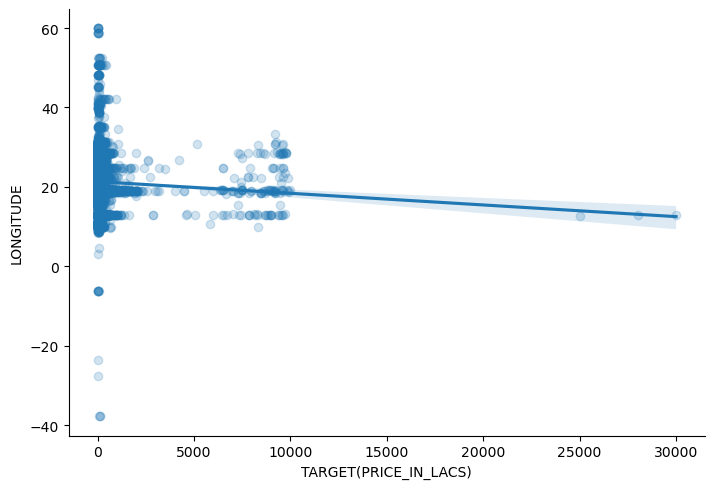

In [352]:
data = df[(df['LONGITUDE'] > 11) & (df['LONGITUDE'] <= 13)]
#data = df[(df['LONGITUDE'] > 17) & (df['LONGITUDE'] <= 20)]
#data = df[(df['LONGITUDE'] > 26) & (df['LONGITUDE'] <= 28)]
#data = df
sns.lmplot(
    x= 'TARGET(PRICE_IN_LACS)', y='LONGITUDE', 
                    data = data , 
           aspect=1.45, scatter_kws={'alpha':0.2})

### Correlación target matituda entre paralelos 76 y 78 (positiva)

/Users/facundolanus/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


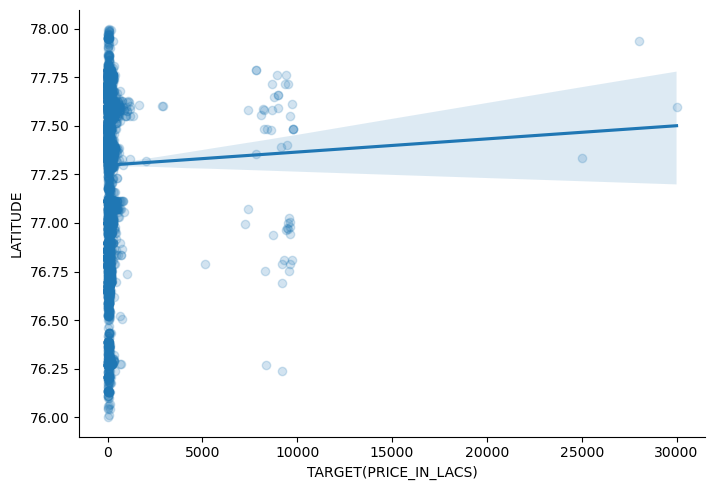

In [315]:
data = df[(df['LATITUDE'] > 76) & (df['LATITUDE'] <= 78)]
#data = df
sns.lmplot(
    x= 'TARGET(PRICE_IN_LACS)', y='LATITUDE', 
                    data = data , 
           aspect=1.45, scatter_kws={'alpha':0.2})

### Histograma target mayor a 5000

(array([ 2., 58.,  2., 50., 11., 12.,  0.,  0.,  1.,  5.]),
 array([70.789479 , 72.5590222, 74.3285654, 76.0981086, 77.8676518,
        79.637195 , 81.4067382, 83.1762814, 84.9458246, 86.7153678,
        88.484911 ]),
 <BarContainer object of 10 artists>)

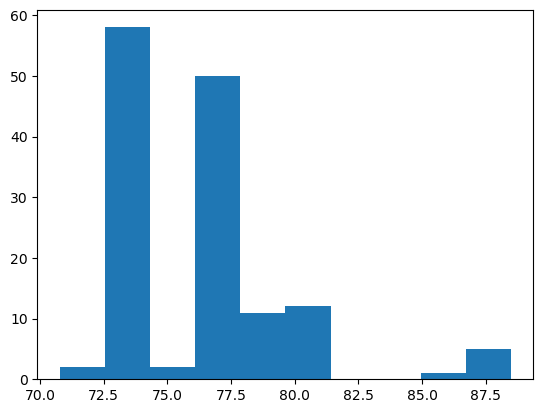

In [6]:
plt.hist(x=df[df['TARGET(PRICE_IN_LACS)']>5000].LATITUDE)

Con la latitud pasa algo similar, las casas entre 5000 y 30.000 se concentran en los paralelos 73, 77 y 87,5. 

### Puntos geográficos con concentración de target altos

/Users/facundolanus/anaconda3/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1683: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


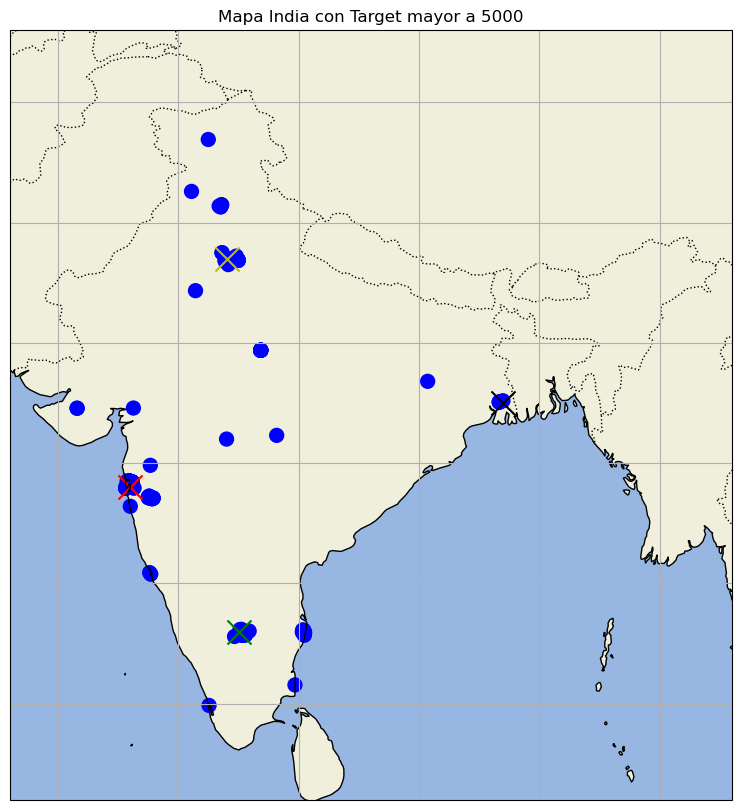

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crear una figura y un conjunto de ejes con proyección
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Ajustar los límites del mapa para mostrar solo la India
ax.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

# Añadir características al mapa
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Añadir líneas de cuadrícula
ax.gridlines()

# Añadir título
plt.title('Mapa India con Target mayor a 5000')

# Calcular el promedio de la variable TARGET
mean_target = df['TARGET(PRICE_IN_LACS)'].mean()

# Asignar colores basados en si el valor de TARGET es mayor o menor que el promedio
#colors = ['red' if val > mean_target else 'blue' for val in df['TARGET(PRICE_IN_LACS)']]
colors = ['Blue' if val > 5000 else 'None' for val in df['TARGET(PRICE_IN_LACS)']]
          
ax.scatter(df['LATITUDE'], df['LONGITUDE'], c = colors, cmap='viridis', s=100
           , transform=ccrs.PlateCarree(), label='Cities')

#grupo amarillo

x = 77
y = 28.5

# Graficar una cruz en la coordenada (x, y)
ax.scatter(x, y, color='y', marker='x', s=300)  # s es el tamaño del marcador

#grupo verde

x = 77.5 
y = 13

# Graficar una cruz en la coordenada (x, y)
ax.scatter(x, y, color='g', marker='x', s=300)  # s es el tamaño del marcador


#grupo rojo

x = 73 
y = 19

# Graficar una cruz en la coordenada (x, y)
ax.scatter(x, y, color='r', marker='x', s=300)  # s es el tamaño del marcador


#grupo azul

x = 88.5
y = 22.5

# Graficar una cruz en la coordenada (x, y)
ax.scatter(x, y, color='black', marker='x', s=300)  # s es el tamaño del marcador


#cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05)
#cbar.set_label('Valor de TARGET')


# Mostrar el mapa
plt.show()


## Generar boxplots y extraer insights de el resto de las variables numericas

{'whiskers': [<matplotlib.lines.Line2D at 0x130ebd110>,
 'caps': [<matplotlib.lines.Line2D at 0x130ebf090>,
 'boxes': [<matplotlib.lines.Line2D at 0x130ebe6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x130e99fd0>],
 'fliers': [],
 'means': []}

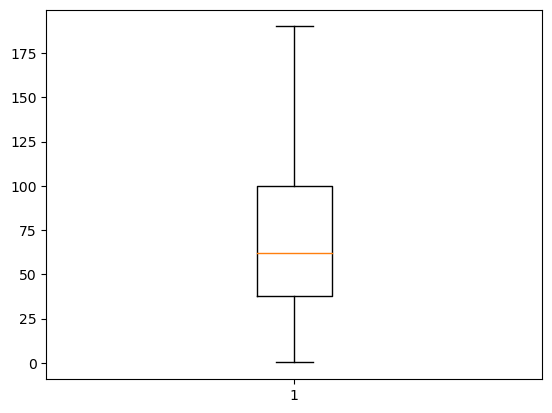

In [14]:
plt.boxplot(df['TARGET(PRICE_IN_LACS)'],showfliers=False)

# Análisis/imputación de valores nulos

In [67]:
df.isna()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,False,False,False,False,False,False,False,False,False,False,False,False
29447,False,False,False,False,False,False,False,False,False,False,False,False
29448,False,False,False,False,False,False,False,False,False,False,False,False
29449,False,False,False,False,False,False,False,False,False,False,False,False


In [268]:
for variable in df.columns:
    print("Cantidad de nulos en la variable", variable,": ", 100*df[variable].isna().sum()/df.shape[0])

Cantidad de nulos en la variable POSTED_BY :  0.0
Cantidad de nulos en la variable UNDER_CONSTRUCTION :  0.0
Cantidad de nulos en la variable RERA :  0.0
Cantidad de nulos en la variable BHK_NO. :  0.0
Cantidad de nulos en la variable BHK_OR_RK :  0.0
Cantidad de nulos en la variable SQUARE_FT :  0.0
Cantidad de nulos en la variable READY_TO_MOVE :  0.0
Cantidad de nulos en la variable RESALE :  0.0
Cantidad de nulos en la variable ADDRESS :  0.0
Cantidad de nulos en la variable LONGITUDE :  0.0
Cantidad de nulos en la variable LATITUDE :  0.0
Cantidad de nulos en la variable TARGET(PRICE_IN_LACS) :  0.0
Cantidad de nulos en la variable mts_2 :  0.0


In [271]:
#Verificamos
for variable in df.columns:
    print("Cantidad de nulos en la variable", variable,": ", 100*df[variable].isna().sum()/df.shape[0])

Cantidad de nulos en la variable POSTED_BY :  0.0
Cantidad de nulos en la variable UNDER_CONSTRUCTION :  0.0
Cantidad de nulos en la variable RERA :  0.0
Cantidad de nulos en la variable BHK_NO. :  0.0
Cantidad de nulos en la variable BHK_OR_RK :  0.0
Cantidad de nulos en la variable SQUARE_FT :  0.0
Cantidad de nulos en la variable READY_TO_MOVE :  0.0
Cantidad de nulos en la variable RESALE :  0.0
Cantidad de nulos en la variable ADDRESS :  0.0
Cantidad de nulos en la variable LONGITUDE :  0.0
Cantidad de nulos en la variable LATITUDE :  0.0
Cantidad de nulos en la variable TARGET(PRICE_IN_LACS) :  0.0
Cantidad de nulos en la variable mts_2 :  0.0


# Relación de features con el target

Si el target es categorica -> no puedo calcular correlacion (de pearson).

Para todas las variables numericas: boxplot por clase

<Axes: xlabel='POSTED_BY', ylabel='TARGET(PRICE_IN_LACS)'>

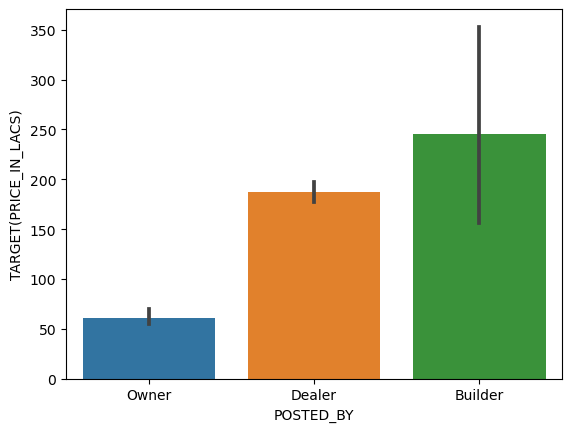

In [82]:
sns.barplot(data=df, x="POSTED_BY", y="TARGET(PRICE_IN_LACS)")
#plt.xscale('log')

Conclusión: El valor posted by = builder, tiene mayor media en el target (son más caras)

<Axes: xlabel='BHK_NO.', ylabel='TARGET(PRICE_IN_LACS)'>

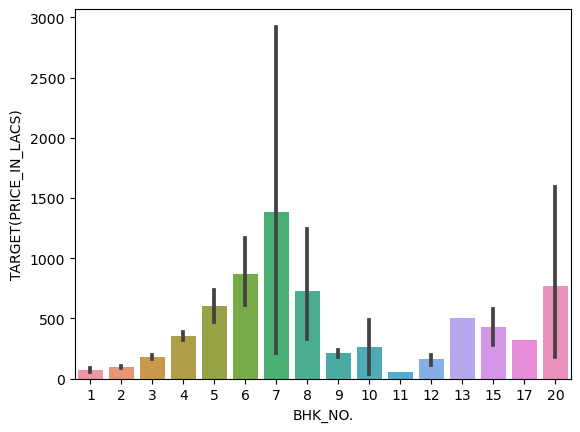

In [79]:
sns.barplot(data=df, x="BHK_NO.", y="TARGET(PRICE_IN_LACS)")

Conclusión: EL valor BHK_NO tiene mayor target cuando es 7.

<Axes: xlabel='BHK_OR_RK', ylabel='TARGET(PRICE_IN_LACS)'>

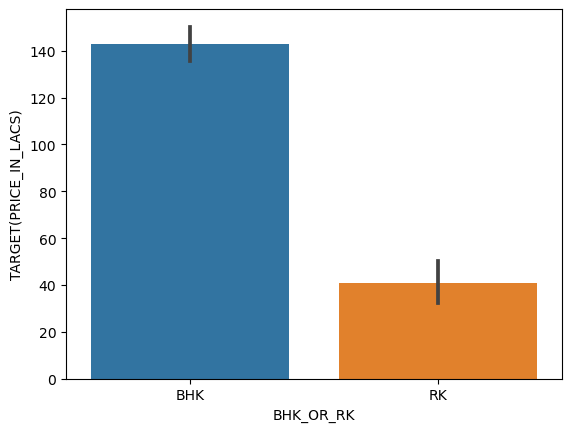

In [80]:
sns.barplot(data=df, x="BHK_OR_RK", y="TARGET(PRICE_IN_LACS)")

Conclusión: El target es mayor cuando la caracteristica es BHK.

# 3 - Correlaciones entre variables

In [54]:
# Correlacion de Pearson entre variables numericas. Matriz de correlacion. Detectar si hay variables colineales o no.

In [74]:
numericas.corr()

,SQUARE_FT,LONGITUDE,LATITUDE,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
SQUARE_FT,1.000000,-0.012591,0.000803,-0.004204,-0.006229,0.005303,0.004204,0.001732,0.402685
LONGITUDE,-0.012591,1.000000,-0.155062,0.006440,0.104976,0.068730,-0.006440,0.024038,-0.031112
LATITUDE,0.000803,-0.155062,1.000000,-0.000381,-0.065106,0.046930,0.000381,0.014844,-0.017254
UNDER_CONSTRUCTION,-0.004204,0.006440,-0.000381,1.000000,0.363826,-0.040712,-1.000000,-0.347405,0.055399
RERA,-0.006229,0.104976,-0.065106,0.363826,1.000000,0.009547,-0.363826,-0.270351,0.067636
BHK_NO.,0.005303,0.068730,0.046930,-0.040712,0.009547,1.000000,0.040712,0.014581,0.112283
READY_TO_MOVE,0.004204,-0.006440,0.000381,-1.000000,-0.363826,0.040712,1.000000,0.347405,-0.055399
RESALE,0.001732,0.024038,0.014844,-0.347405,-0.270351,0.014581,0.347405,1.000000,-0.207378
TARGET(PRICE_IN_LACS),0.402685,-0.031112,-0.017254,0.055399,0.067636,0.112283,-0.055399,-0.207378,1.000000


#### Transformaciones

In [65]:
df['LACS_SQUARE_FT'] = df['TARGET(PRICE_IN_LACS)']/df['SQUARE_FT']

In [33]:
import numpy as np

In [39]:
df['ALTOVALOR'] = np.where(
    (
        ((df['LATITUDE'] > 76.5) & (df['LATITUDE'] < 77.5) & (df['LONGITUDE'] > 28) & (df['LONGITUDE'] < 29)) |
        ((df['LATITUDE'] > 77) & (df['LATITUDE'] < 78) & (df['LONGITUDE'] > 12.5) & (df['LONGITUDE'] < 13.5)) |
        ((df['LATITUDE'] > 72.5) & (df['LATITUDE'] < 73.5) & (df['LONGITUDE'] > 18.5) & (df['LONGITUDE'] < 19.5)) |
        ((df['LATITUDE'] > 88) & (df['LATITUDE'] < 89) & (df['LONGITUDE'] > 22) & (df['LONGITUDE'] < 23))
    ),
    1,
    0
)

In [54]:
df['BUILDER'] = np.where( df['POSTED_BY'] == 'Builder' , 1, 0) 

### Matriz de correlación entre variables numericas

In [66]:
numericas = df[['SQUARE_FT','LONGITUDE','LATITUDE', 'UNDER_CONSTRUCTION',
                'RERA', 'BHK_NO.','READY_TO_MOVE', 'RESALE'
                ,'LACS_SQUARE_FT','ALTOVALOR','BHK_7','BUILDER',
                'TARGET(PRICE_IN_LACS)']]

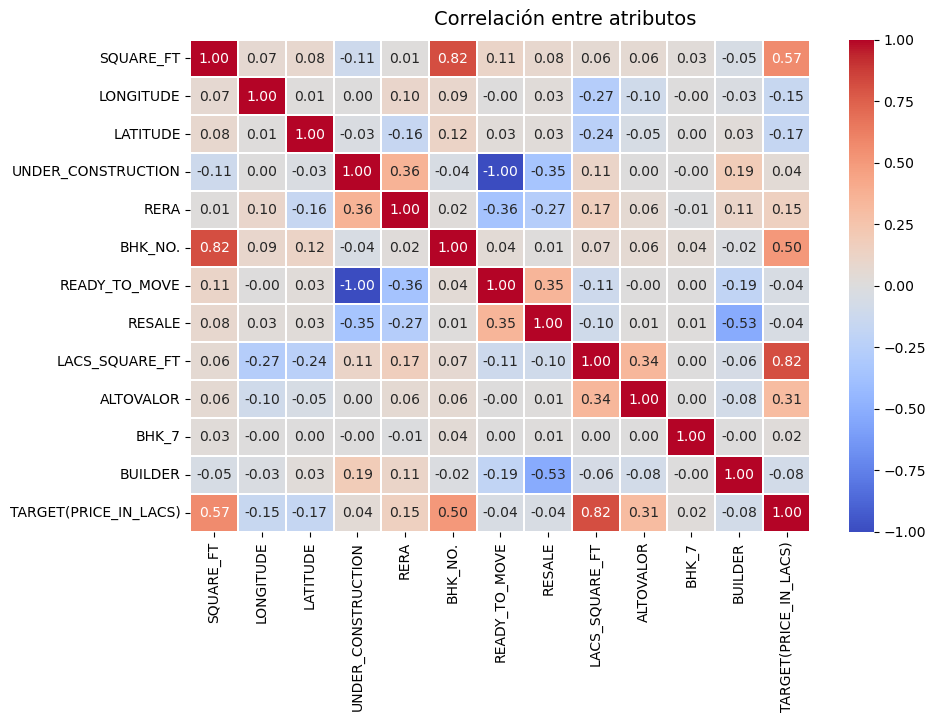

In [67]:
f, ax = plt.subplots(figsize=(10, 6))
corr = numericas.corr(method='spearman')
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlación entre atributos', fontsize=14)

Conclusión: a partir de la matriz de correlación se puede ver que existe correlación positiva entre el Target y los metros cuadrados, es decir que aumentan en la misma dirección (0.40). En segundo lugar estan Rera y Under Construction (0.36) y por último Resale y Ready To Move (0.35). Además, viendo que READY TO MOVE y UNDER CONSTRUCTION tienen correlación igual a -1, se pude decir que son la misma variable o explican lo mismo.

# 4 - Regresion Lineal

/Users/facundolanus/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


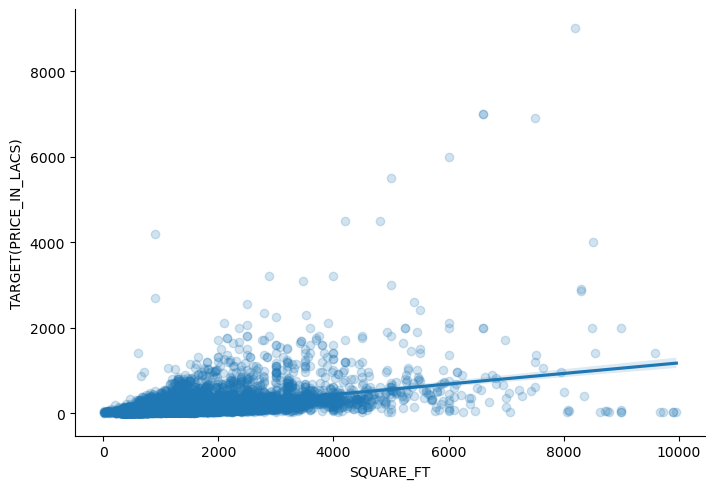

In [17]:
sns.lmplot(data = df[df['SQUARE_FT']<10000], x = 'SQUARE_FT', y = 'TARGET(PRICE_IN_LACS)', 
           aspect=1.45, scatter_kws={'alpha':0.2})

## Construyendo el modelo de regresion lineal

In [ ]:
Definir columnas de X e Y, excluyendo los valores atípicos.

In [75]:
dfso = df[df['SQUARE_FT']<10000]
Xso = dfso['SQUARE_FT'].values.reshape(-1,1)
yso =dfso['TARGET(PRICE_IN_LACS)'].values.reshape(-1,1)

 #### Importar modelo de saikit learn

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
linregso = LinearRegression()
linregso

LinearRegression()

#### Entrenar el model

In [76]:
linregso.fit(Xso, yso)

LinearRegression()

In [77]:
# Imprimimos coeficientes

print (linregso.intercept_)
print (linregso.coef_)

[-59.37036961]
[[0.12318706]]


El resultado indica que el precio en lacs está dado por -59.37 LACS de base y que aumenta en 0,12 LACS por cada unidad de SQUARE_FT que se adicione.

In [86]:
SQUARE_FT = 10000
linregso.intercept_ + linregso.coef_ * SQUARE_FT

array([[1172.50022375]])

In [81]:
SQUARE_FT = np.array(10000).reshape(-1,1)
linregso.predict(SQUARE_FT)

array([[1172.50022375]])

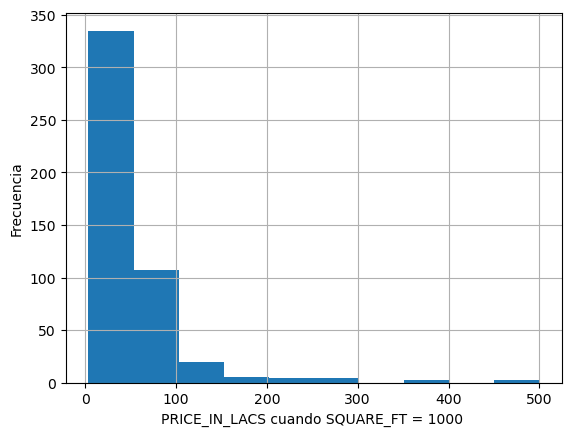

In [95]:
dfso[np.isclose(dfso['SQUARE_FT'],1000)]['TARGET(PRICE_IN_LACS)'].hist()
plt.xlabel("PRICE_IN_LACS cuando SQUARE_FT = 1000 ")
plt.ylabel("Frecuencia")
plt.show()

### Medir los errores para comparar modelos

#### Modelo 'so' (sin outliers) filtrando datos cuando SQARE_FT es menor a 10.000

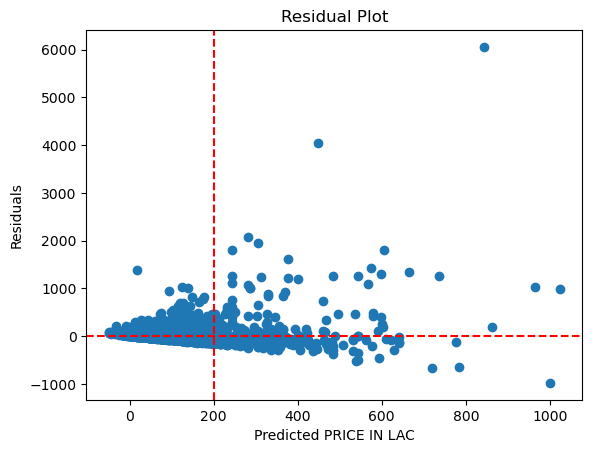

In [186]:
X_train, X_test, y_train, y_test = train_test_split(Xso, yso, test_size=0.2, random_state=42)

linregso.fit(X_train, y_train)

y_pred = linregso.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted PRICE IN LAC')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=200, color='r', linestyle='--')
plt.show()

#### Error de entrenamiento con modelo so

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(Xso, yso, test_size=0.2, random_state=42)
linregso.fit(X_train, y_train)
y_pred = linregso.predict(X_test)
# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 159.545292923592


#### Error con todos los datos del modelo so

In [184]:
linregso.fit(Xso, yso)
y_pred = linregso.predict(Xso)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(yso, y_pred)

# Calcular el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 162.63945297732664


### Conculsión:
* El modelo con datos de entrenamiento, excepto outliers, tuvo una raiz de los errores medio de 159,55
* El modelo usando todos los datos (realidad) , excepto outliers, tuvo una raiz de los errores meido de 162,63
* Al parecer, segun el ploteo de residuos, estos están correlacionados con el valor X (Price in LAC) siendo que aumentan su valor, cuando aumenta X. Los residuos deberian mostrarse por debajo y por encima del eje X, equtativamente y cercanos a cero. Esta condición ocurre solo hasta los valores, aproximados, de X = 200.

#### Modelo entrenado con todos los datos

In [175]:
#dffiltro = df[df['SQUARE_FT']<10000]
X = df[['SQUARE_FT']]
y =df[['TARGET(PRICE_IN_LACS)']]
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg
linreg.fit(X, y)
print (linreg.intercept_)
print (linreg.coef_)

[140.14384635]
[[0.00013912]]


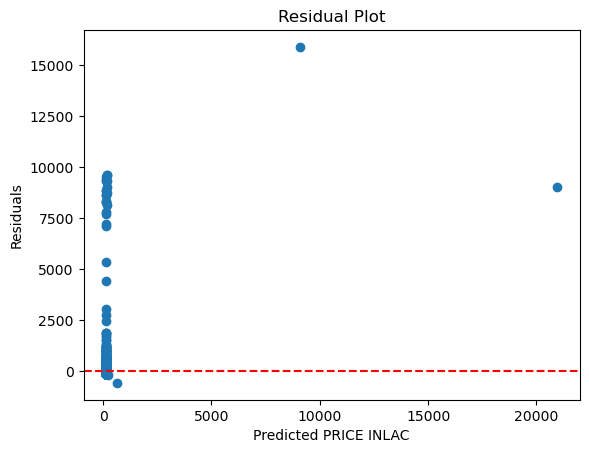

In [181]:
X = df[['SQUARE_FT']]
y =df[['TARGET(PRICE_IN_LACS)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted PRICE IN LAC')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df[['SQUARE_FT']]
y =df[['TARGET(PRICE_IN_LACS)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = linreg.predict(X_test)
# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 567.3107552194381


### Agregando más features

In [57]:
feature_cols = ['SQUARE_FT', 'BHK_NO.','ALTOVALOR']
X = df[feature_cols]
y =df[['TARGET(PRICE_IN_LACS)']]
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg
linreg.fit(X, y)
print (linreg.intercept_)
print (linreg.coef_)

[-85.3126952]
[[1.38763494e-04 8.01699774e+01 6.67577673e+01]]


#### Medida del error

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
feature_cols = ['SQUARE_FT', 'BHK_NO.','ALTOVALOR']
X = df[feature_cols]
y =df[['TARGET(PRICE_IN_LACS)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = linreg.predict(X_test)
# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#R2
R2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2: {R2}')

RMSE: 751.4206141496137
R2: -0.03627640922880948


#### Comprobación

In [64]:
-85 + 1.38763494e-04 * 1300.23 + 8.01699774e+01 * 2 + 6.67577673e+01 * 1

142.2781465578036

In [63]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LACS_SQARE_FT,LACS_SQUARE_FT,ALTOVALOR,BHK,BHK_7,BUILDER
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,23.640662,23.640662,1,1,0,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,25.000000,25.000000,0,1,0,0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,21.701389,21.701389,1,1,0,0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,14.878738,14.878738,1,1,0,0
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,16.512550,16.512550,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,55.555556,55.555556,0,1,0,0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,48.076923,48.076923,0,1,0,0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,37.735849,37.735849,0,1,0,0
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,13.837000,13.837000,0,1,0,0


Agregando métricas, como ubicación, mejora un poco el error, pero sigue siendo alto.

#### Usuando variable transformada precio/superficie

In [68]:
feature_cols = ['SQUARE_FT', 'BHK_NO.','ALTOVALOR']
X = df[feature_cols]
y =df[['LACS_SQUARE_FT']]
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg
linreg.fit(X, y)
print (linreg.intercept_)
print (linreg.coef_)

[0.04369007]
[[-4.68645444e-10  5.87875600e-03  3.42861001e-02]]


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
feature_cols = ['SQUARE_FT', 'BHK_NO.','ALTOVALOR']
X = df[feature_cols]
y =df[['LACS_SQUARE_FT']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = linreg.predict(X_test)
# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R2

R2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')

print(f'R2: {R2}')

RMSE: 0.07484061340274434
R2: 0.05202968309923017


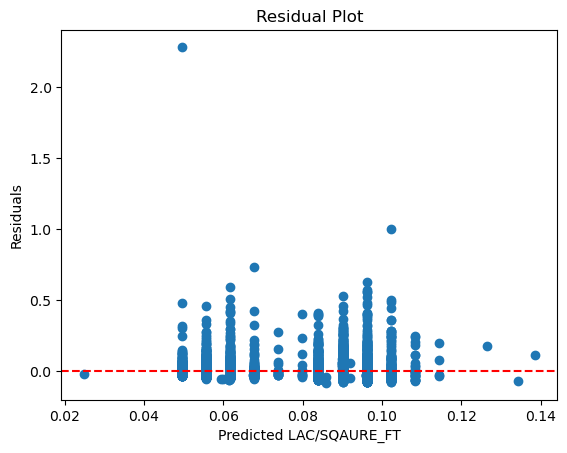

In [88]:
feature_cols = ['SQUARE_FT', 'BHK_NO.','ALTOVALOR']
X = df[feature_cols]
y =df[['LACS_SQUARE_FT']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted LAC/SQAURE_FT')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### Comprobación

In [98]:
# intercept + coef.1 * square_ft +coef.2 * bhk_no + coef.3 * altovalor * square_ft
resultado = 0.04369007 - 4.68645444e-10 * 1300.23 + 5.87875600e-03 * 2 + 3.42861001e-02 * 1 * 1300.23
print(f'Predicción del valor de la casa: {resultado}')
print(f' valor de la casa: {55}')
diferencia = 1-resultado/55
print(f' diferencia: {diferencia}')

Predicción del valor de la casa: 44.635262905676136
 valor de la casa: 55
 diferencia: 0.18844976535134295


In [76]:
df.head(1)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LACS_SQARE_FT,LACS_SQUARE_FT,ALTOVALOR,BHK,BHK_7,BUILDER
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.96991,77.59796,55.0,23.640662,0.0423,1,1,0,0


In [99]:
# intercept + coef.1 * square_ft +coef.2 * bhk_no + coef.3 * altovalor * square_ft

resultado = 0.04369007 - 4.68645444e-10 * 106469.00270 + 5.87875600e-03 * 3 + 3.42861001e-02 * 0

print(f'Predicción del valor/square_ft de la casa: {resultado}')
print(f' valor/square_ft de la casa: {0.08904}')
diferencia = 1-resultado/0.08904
print(f' diferencia: {diferencia}')

Predicción del valor/square_ft de la casa: 0.06127644178695742
 valor/square_ft de la casa: 0.08904
 diferencia: 0.3118099529766687


In [100]:
df[df['TARGET(PRICE_IN_LACS)']>5000].head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LACS_SQARE_FT,LACS_SQUARE_FT,ALTOVALOR,BHK,BHK_7,BUILDER
40,Dealer,1,1,1,BHK,40606.19568,0,0,"Kanjur Marg (East),Lalitpur",24.69028,78.41889,9110.0,4.457321,0.22435,0,1,0,0
294,Builder,1,1,3,BHK,106469.00270,0,0,"Vishrantwadi,Lalitpur",24.69028,78.41889,9480.0,11.230907,0.08904,0,1,0,1


### Lasso regresion

In [16]:
#Lasso Regression

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Paso 1: Cargar datos
feature_cols = ['SQUARE_FT', 'BHK_NO.', 'LONGITUDE','LATITUDE']
#feature_cols = ['SQUARE_FT']
X = df[feature_cols]
y =df[['TARGET(PRICE_IN_LACS)']]

# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 4: Entrenar el modelo Lasso
lasso = Lasso(alpha=0.1)  # Puedes ajustar el valor de alpha según sea necesario
lasso.fit(X_train_scaled, y_train)

# Paso 5: Evaluar el modelo
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

# Métricas de evaluación
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Error cuadrático medio en entrenamiento: {mse_train:.4f}")
print(f'RMSE entrenamiento: {rmse_train}')
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f'RMSE de prueba: {rmse_test}')
print(f"R^2 en entrenamiento: {r2_train:.4f}")
print(f"R^2 en prueba: {r2_test:.4f}")

# Coeficientes del modelo
print("Coeficientes del modelo Lasso:")
print(pd.Series(lasso.coef_, index=X.columns))

Error cuadrático medio en entrenamiento: 362978.0754
RMSE entrenamiento: 602.4766181683954
Error cuadrático medio en prueba: 339639.8720
RMSE de prueba: 582.7863004198969
R^2 en entrenamiento: 0.0996
R^2 en prueba: 0.3767
Coeficientes del modelo Lasso:
SQUARE_FT    183.354783
BHK_NO.       75.833068
LONGITUDE    -26.648233
LATITUDE     -18.683009
dtype: float64


In [17]:
# Imprimimos coeficientes
print (lasso.intercept_)
print (lasso.coef_)

[143.45618718]
[183.35478336  75.83306819 -26.64823332 -18.68300934]


In [101]:
df.head(1)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LACS_SQARE_FT,LACS_SQUARE_FT,ALTOVALOR,BHK,BHK_7,BUILDER
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.96991,77.59796,55.0,23.640662,0.0423,1,1,0,0


In [20]:
183.35 * 1300.24 + 75.82 * 2 -26.65 * 12.97 - 18.68 * 77.58

236755.7991

Usando el modelo Lasso da peor que con el de regresión típico.

##### Nota al pie: Teniendo en cuenta que no se conocen características y no se usa información por fuera del dataset, el trabajo anterior busca aproximar una respuesta a la realidad del valor de las casas en la India y se debe considerar la inequidad económica particualar, que impacata en la variabilidad de los valores de las casas.